In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
def create_ages(mu = 50, sigma = 13, num_samples = 100, seed = 42):
    
    # set a random seed in the same cell as the random call
    # we set seed to 42 (42 is an orbitary choice from )
    np.random.seed(seed)
    
    sample_ages = np.random.normal(loc = mu, scale = sigma, size =num_samples)
    sample_ages = np.round(sample_ages, decimals = 0)
    
    return sample_ages

In [3]:
sample = create_ages()

In [4]:
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

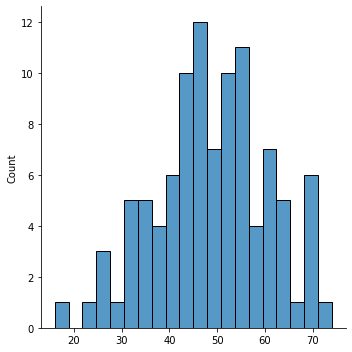

In [5]:
sns.displot(sample, bins = 20)

<AxesSubplot:>

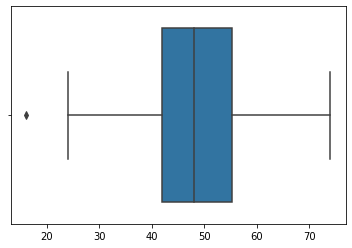

In [6]:
sns.boxplot(sample)

In [7]:
ser = pd.Series(sample)

In [8]:
ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

In [9]:
IQR = 55.25000 - 42.00000
lower_limit = 42 - 1.5 * (IQR)

In [10]:
lower_limit

22.125

In [11]:
ser[ser > lower_limit]

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 99, dtype: float64

In [12]:
q75, q25 = np.percentile(sample, [75,25])
iqr = q75 - q25

In [13]:
q25 - 1.5 * iqr

22.125

In [14]:
df = pd.read_csv('Ames_Housing_Data.csv')
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [15]:
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

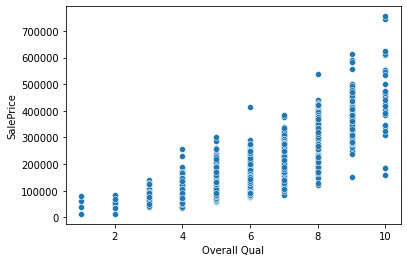

In [16]:
sns.scatterplot(x ='Overall Qual', y ='SalePrice', data =df)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

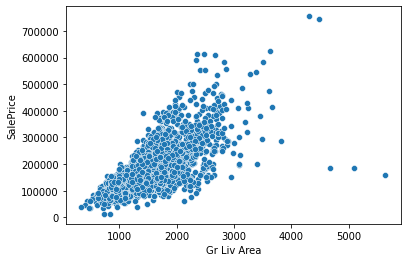

In [17]:
sns.scatterplot(x ='Gr Liv Area', y ='SalePrice', data =df)

In [18]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [19]:
drop_ind = df[(df['Overall Qual']>8) & (df['SalePrice']<200000)].index

In [20]:
drop_ind

Int64Index([1182, 1498, 2180, 2181], dtype='int64')

In [21]:
df = df.drop(drop_ind, axis = 0)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

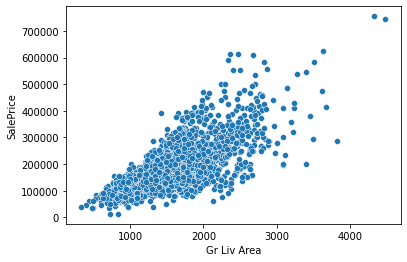

In [22]:
sns.scatterplot(x ='Gr Liv Area', y ='SalePrice', data =df)

In [23]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']>700000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1760,528320050,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1767,528351010,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


In [24]:
df.to_csv('Ames_outlier_removed')

In [25]:
df = pd.read_csv('Ames_outlier_removed')
df.head()

,Unnamed: 0,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [26]:
df.shape

(2926, 82)

In [27]:
df = df.drop('Unnamed: 0', axis  = 1)

In [28]:
df = df.drop('PID', axis = 1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2926 entries, 0 to 2925
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2926 non-null   int64  
 1   MS Zoning        2926 non-null   object 
 2   Lot Frontage     2437 non-null   float64
 3   Lot Area         2926 non-null   int64  
 4   Street           2926 non-null   object 
 5   Alley            198 non-null    object 
 6   Lot Shape        2926 non-null   object 
 7   Land Contour     2926 non-null   object 
 8   Utilities        2926 non-null   object 
 9   Lot Config       2926 non-null   object 
 10  Land Slope       2926 non-null   object 
 11  Neighborhood     2926 non-null   object 
 12  Condition 1      2926 non-null   object 
 13  Condition 2      2926 non-null   object 
 14  Bldg Type        2926 non-null   object 
 15  House Style      2926 non-null   object 
 16  Overall Qual     2926 non-null   int64  
 17  Overall Cond  

In [30]:
100 * df.isnull().sum() / len(df)

MS SubClass        0.000000
MS Zoning          0.000000
Lot Frontage      16.712235
Lot Area           0.000000
Street             0.000000
                    ...    
Mo Sold            0.000000
Yr Sold            0.000000
Sale Type          0.000000
Sale Condition     0.000000
SalePrice          0.000000
Length: 80, dtype: float64

In [31]:
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    
    return percent_nan

In [32]:
percent_nan = percent_missing(df)

In [33]:
percent_nan

Electrical         0.034176
Garage Area        0.034176
Total Bsmt SF      0.034176
Bsmt Unf SF        0.034176
BsmtFin SF 1       0.034176
BsmtFin SF 2       0.034176
Garage Cars        0.034176
Bsmt Full Bath     0.068353
Bsmt Half Bath     0.068353
Mas Vnr Area       0.786056
Mas Vnr Type       0.786056
BsmtFin Type 1     2.734108
Bsmt Qual          2.734108
Bsmt Cond          2.734108
BsmtFin Type 2     2.768284
Bsmt Exposure      2.836637
Garage Type        5.365687
Garage Finish      5.434040
Garage Qual        5.434040
Garage Cond        5.434040
Garage Yr Blt      5.434040
Lot Frontage      16.712235
Fireplace Qu      48.598770
Fence             80.451128
Alley             93.233083
Misc Feature      96.411483
Pool QC           99.589884
dtype: float64

(0.0, 1.0)

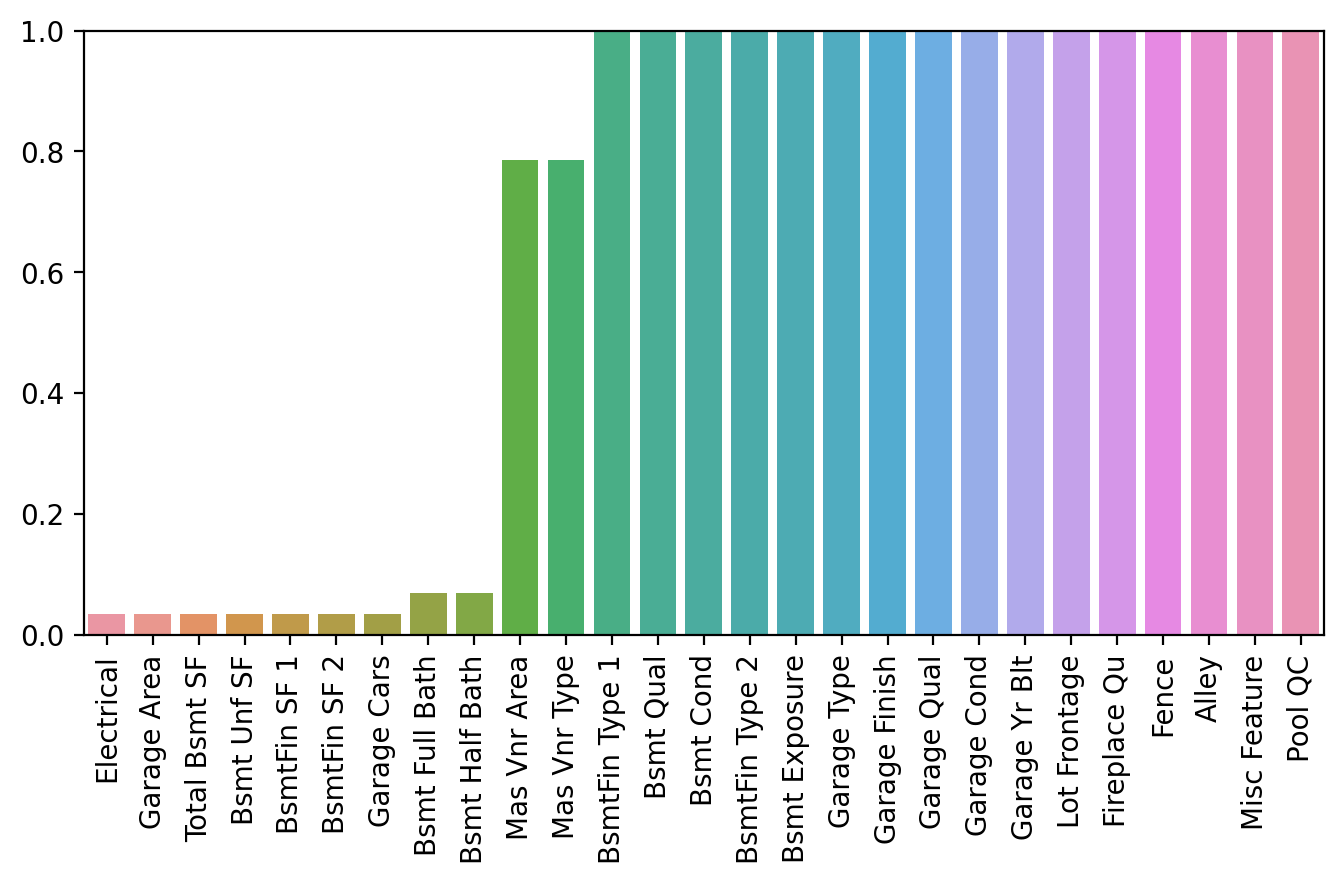

In [34]:
plt.figure(figsize = (8,4), dpi = 200)
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90)
plt.ylim(0,1)

In [35]:
percent_nan[percent_nan < 1]

Electrical        0.034176
Garage Area       0.034176
Total Bsmt SF     0.034176
Bsmt Unf SF       0.034176
BsmtFin SF 1      0.034176
BsmtFin SF 2      0.034176
Garage Cars       0.034176
Bsmt Full Bath    0.068353
Bsmt Half Bath    0.068353
Mas Vnr Area      0.786056
Mas Vnr Type      0.786056
dtype: float64

In [36]:
df[df['Electrical'].isnull()]['Garage Area']

1575    400.0
Name: Garage Area, dtype: float64

In [37]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1340,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1496,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [38]:
df = df.dropna(axis = 0, subset = ['Electrical', 'Garage Cars'])

In [39]:
percent_nan = percent_missing(df)

In [40]:
percent_nan[percent_nan < 1]

Bsmt Unf SF       0.034200
Total Bsmt SF     0.034200
BsmtFin SF 2      0.034200
BsmtFin SF 1      0.034200
Bsmt Full Bath    0.068399
Bsmt Half Bath    0.068399
Mas Vnr Type      0.786594
Mas Vnr Area      0.786594
dtype: float64

(0.0, 1.0)

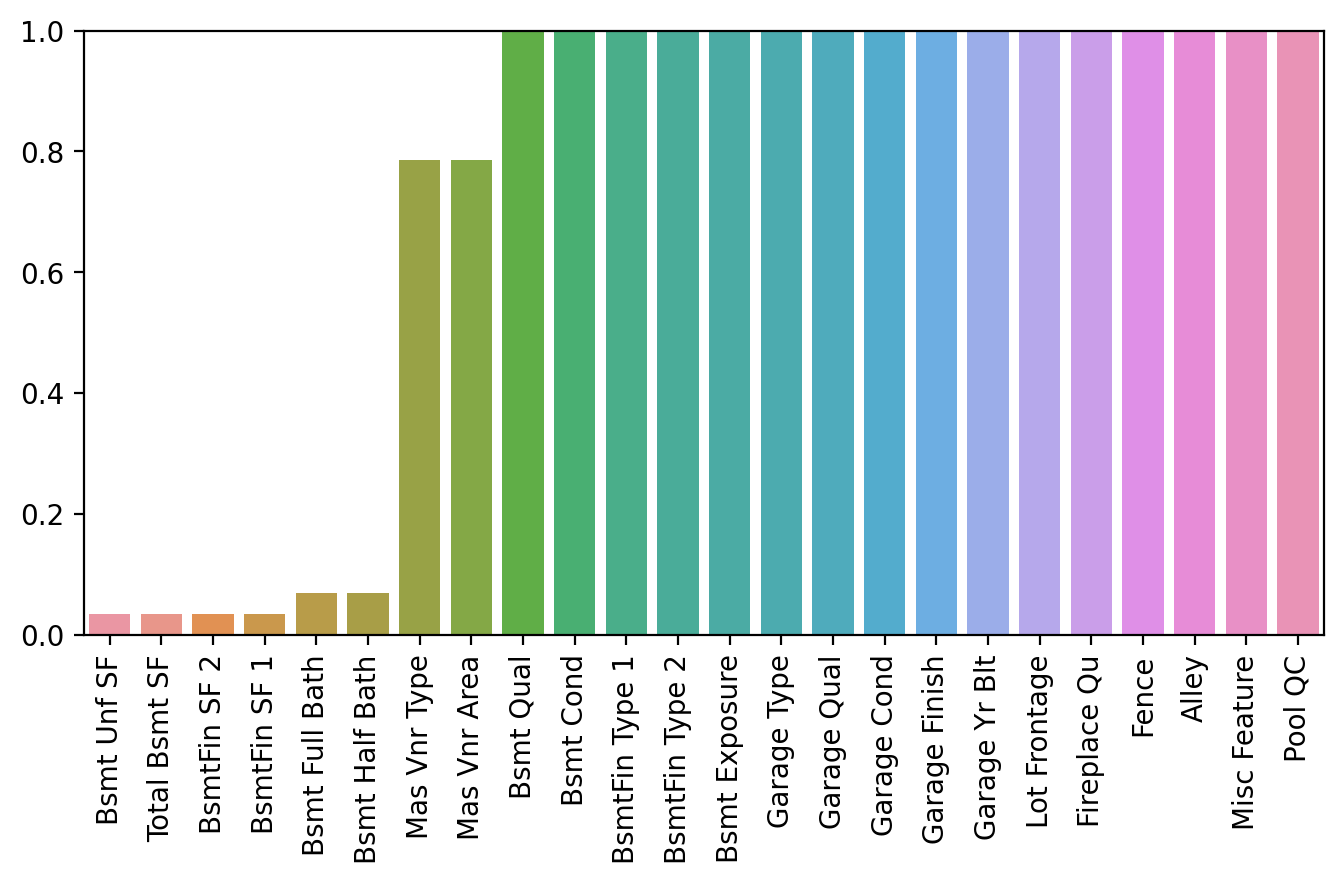

In [41]:
plt.figure(figsize = (8,4), dpi = 200)
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90)
plt.ylim(0,1)

In [42]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1340,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1496,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [43]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1340,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1496,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [44]:
df[df['Bsmt Unf SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1340,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [45]:
# Basement Neumeric columns ----> fillna(0)
bsmnt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']

df[bsmnt_num_cols] = df[bsmnt_num_cols].fillna(0)
# Baement strig columns -------> fillna('None')
bsmnt_str_col = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']

df[bsmnt_str_col] = df[bsmnt_str_col].fillna('None')

In [46]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


(0.0, 1.0)

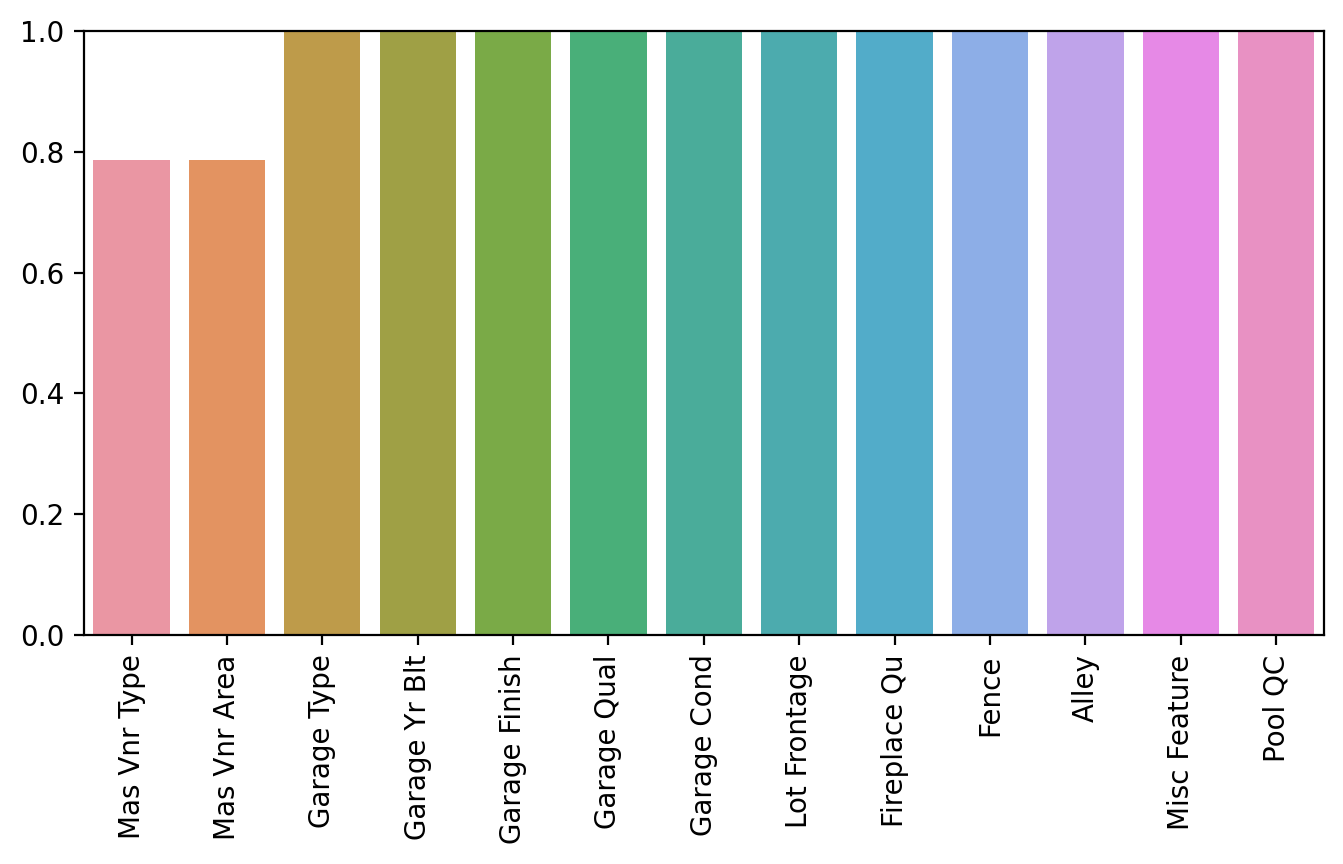

In [47]:
percent_nan = percent_missing(df)

plt.figure(figsize = (8,4), dpi = 200)
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90)
plt.ylim(0,1)

In [48]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')

In [49]:
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

In [52]:
percent_nan = percent_missing(df)

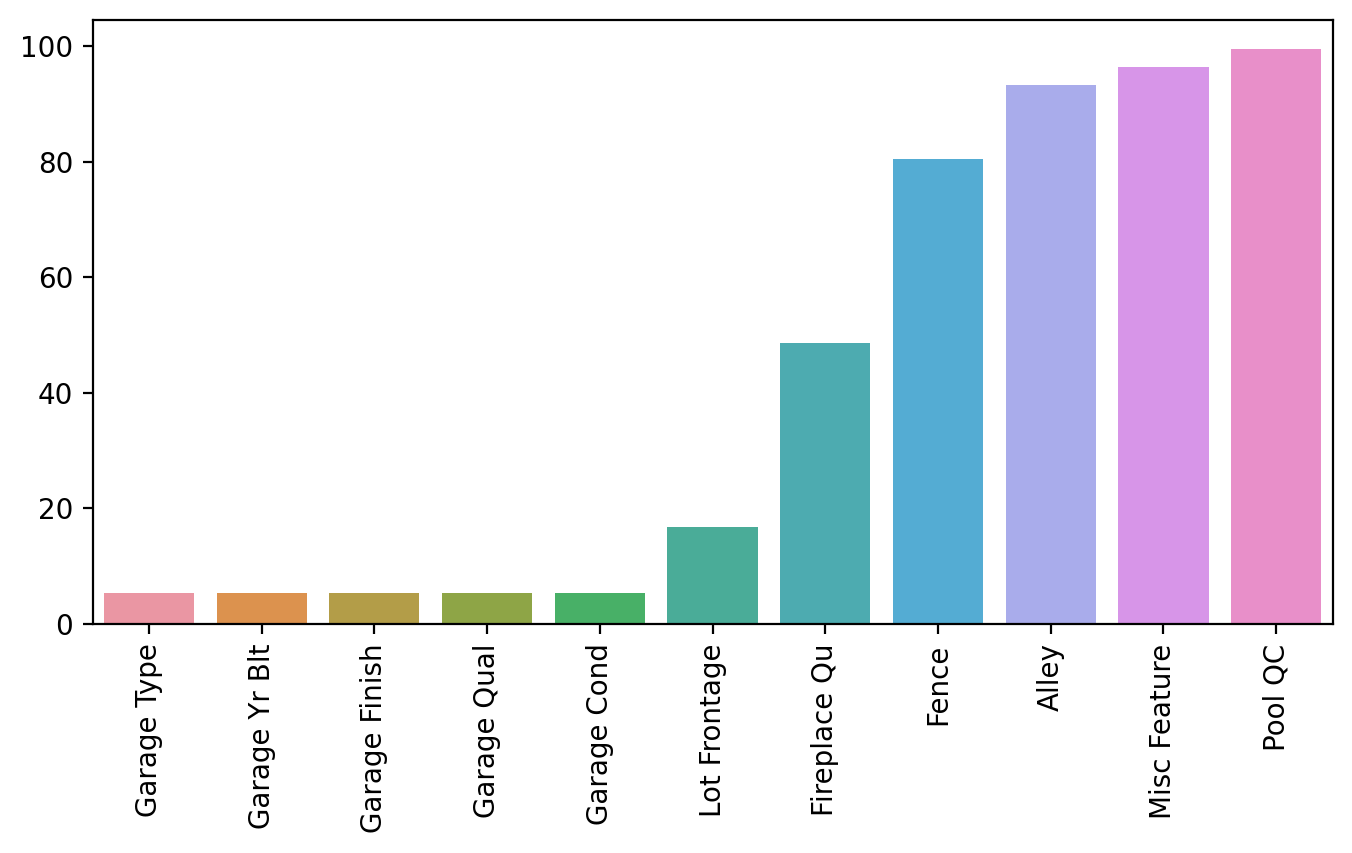

In [55]:
plt.figure(figsize = (8,4), dpi = 200)
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90);

In [56]:
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Gara

In [58]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']

df[gar_str_cols] = df[gar_str_cols].fillna('None')

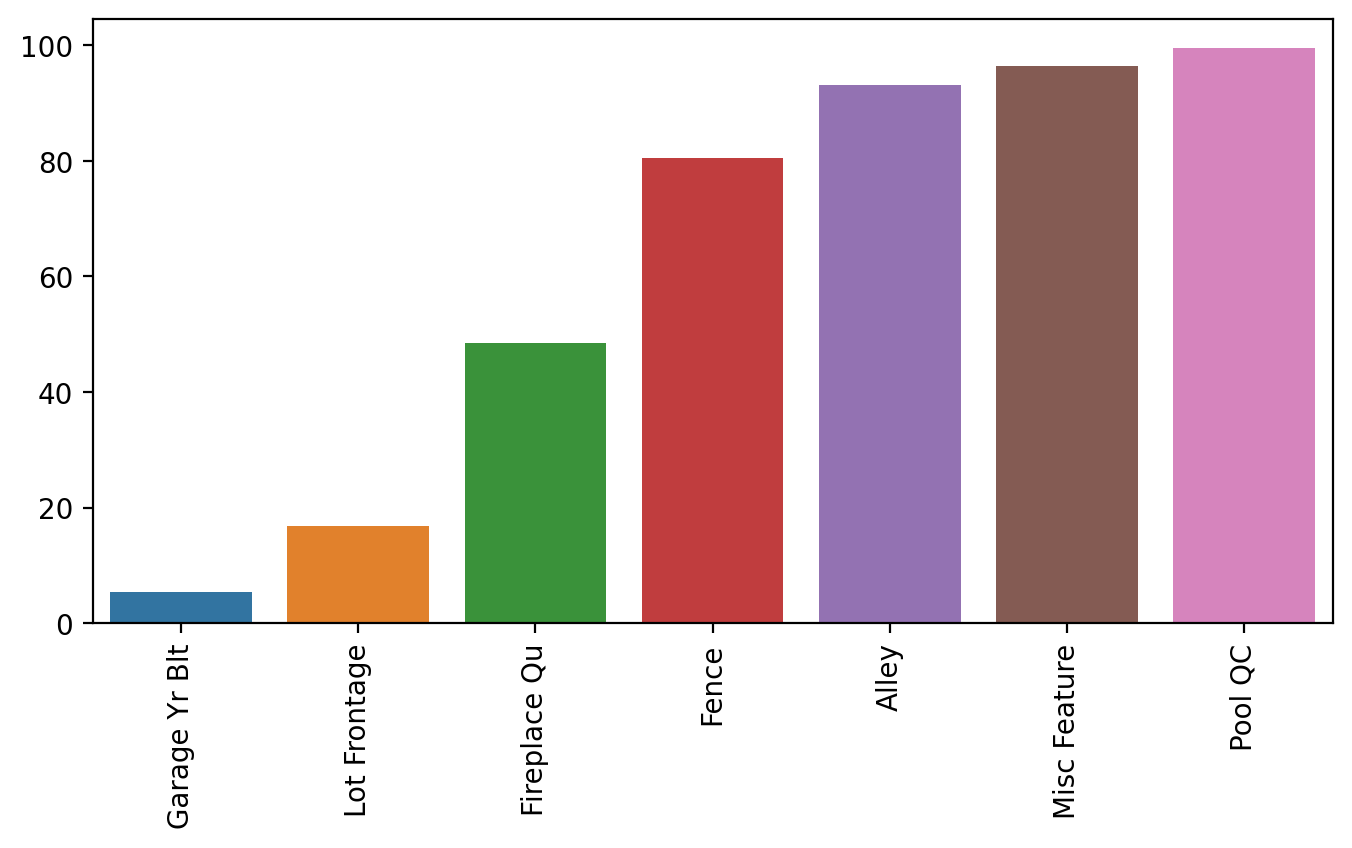

In [59]:
percent_nan = percent_missing(df)

plt.figure(figsize = (8,4), dpi = 200)
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90);

In [60]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [61]:
df = df.drop(['Alley', 'Fence', 'Misc Feature', 'Pool QC'], axis = 1)

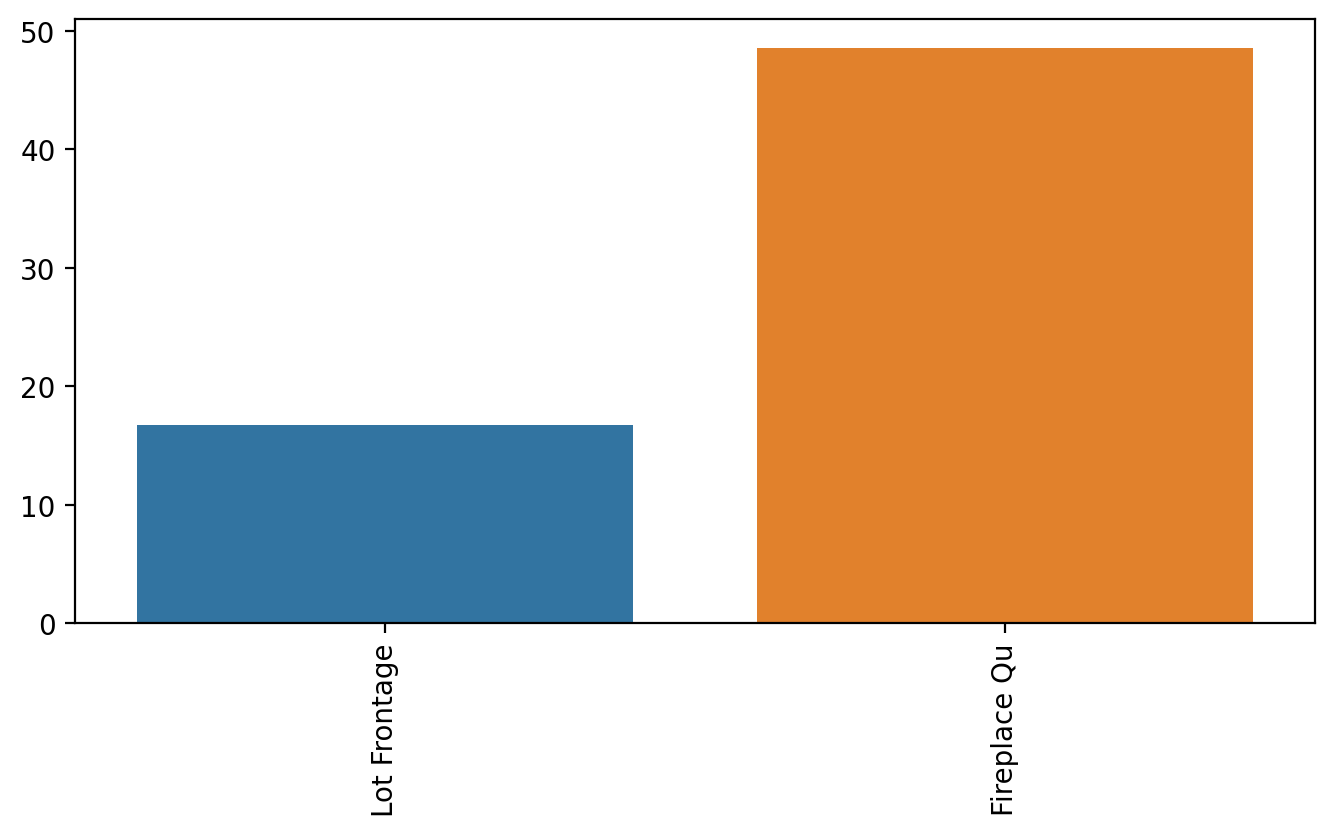

In [62]:
percent_nan = percent_missing(df)

plt.figure(figsize = (8,4), dpi = 200)
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90);

In [63]:
df['Fireplace Qu'].value_counts()

Gd    740
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

In [64]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

In [65]:
df['Lot Frontage'].value_counts()

60.0     276
80.0     137
70.0     133
50.0     116
75.0     105
        ... 
119.0      1
137.0      1
25.0       1
152.0      1
133.0      1
Name: Lot Frontage, Length: 128, dtype: int64

In [67]:
# Neighborhood: Physical locations within Ames city limits

# LotFrontage: Linear of street connected to property

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

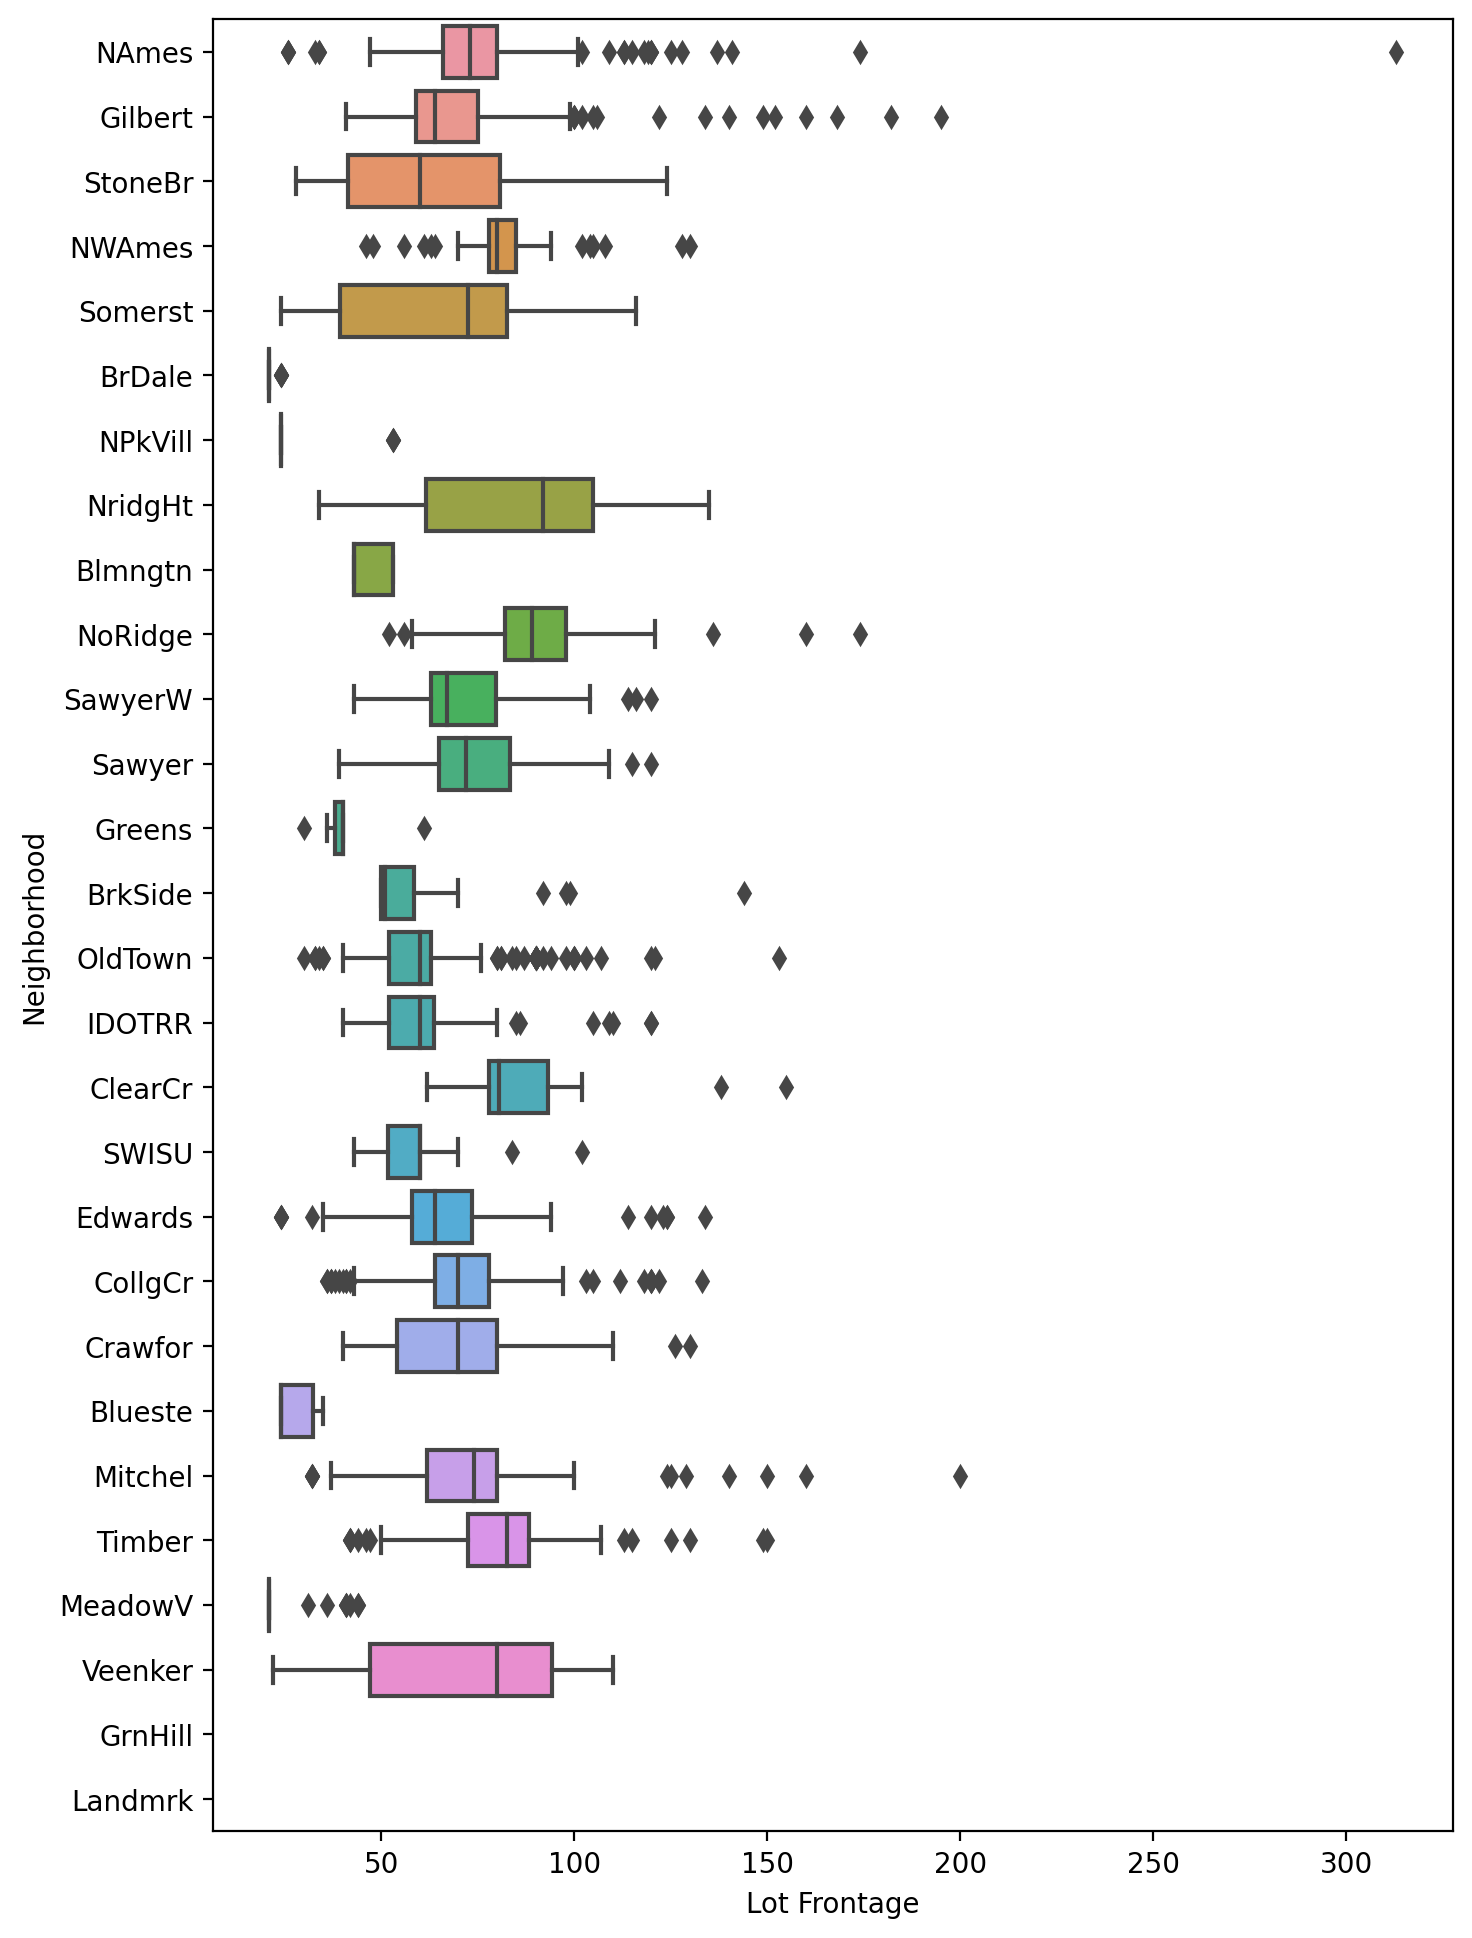

In [70]:
plt.figure(figsize = (8,12), dpi = 200)
sns.boxplot(x = 'Lot Frontage', y = 'Neighborhood', data = df, orient = 'h')

In [72]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [74]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

In [77]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [76]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [78]:
df.to_csv('Ames_missing_values_removed')

In [79]:
df = pd.read_csv('Ames_missing_values_removed')
df.head()

,Unnamed: 0,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [91]:
df = df.drop('Unnamed: 0', axis = 1)

In [92]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2924 non-null   object 
 1   MS Zoning        2924 non-null   object 
 2   Lot Frontage     2924 non-null   float64
 3   Lot Area         2924 non-null   int64  
 4   Street           2924 non-null   object 
 5   Lot Shape        2924 non-null   object 
 6   Land Contour     2924 non-null   object 
 7   Utilities        2924 non-null   object 
 8   Lot Config       2924 non-null   object 
 9   Land Slope       2924 non-null   object 
 10  Neighborhood     2924 non-null   object 
 11  Condition 1      2924 non-null   object 
 12  Condition 2      2924 non-null   object 
 13  Bldg Type        2924 non-null   object 
 14  House Style      2924 non-null   object 
 15  Overall Qual     2924 non-null   int64  
 16  Overall Cond     2924 non-null   int64  
 17  Year Built    

In [94]:
df['MS SubClass'] = df['MS SubClass'].apply(str)

In [95]:
object_df = df.select_dtypes(include = 'object')

In [96]:
object_df

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2919,80,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,TA,Typ,None,Detchd,Unf,TA,TA,Y,WD,Normal
2920,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2921,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,None,None,None,None,None,Y,WD,Normal
2922,20,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [97]:
numeric_df = df.select_dtypes(exclude = 'object')

In [98]:
numeric_df

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,210,62,0,0,0,0,0,5,2010,215000
1,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,140,0,0,0,120,0,0,6,2010,105000
2,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,0,0,0,4,2010,244000
4,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2919,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,120,0,0,0,0,0,0,3,2006,142500
2920,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,164,0,0,0,0,0,0,6,2006,131000
2921,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,80,32,0,0,0,0,700,7,2006,132000
2922,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,240,38,0,0,0,0,0,4,2006,170000


In [99]:
df_object_dummies = pd.get_dummies(object_df, drop_first=True)

In [100]:
df_object_dummies 

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2919,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2920,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2921,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2922,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [101]:
df = pd.concat([df_object_dummies, numeric_df], axis = 1)

In [102]:
df

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,0,0,0,0,1,0,0,0,0,0,...,210,62,0,0,0,0,0,5,2010,215000
1,0,0,0,0,1,0,0,0,0,0,...,140,0,0,0,120,0,0,6,2010,105000
2,0,0,0,0,1,0,0,0,0,0,...,393,36,0,0,0,0,12500,6,2010,172000
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,4,2010,244000
4,0,0,0,0,0,0,0,0,0,1,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2919,0,0,0,0,0,0,0,0,0,0,...,120,0,0,0,0,0,0,3,2006,142500
2920,0,0,0,0,1,0,0,0,0,0,...,164,0,0,0,0,0,0,6,2006,131000
2921,0,0,0,0,0,0,0,0,0,0,...,80,32,0,0,0,0,700,7,2006,132000
2922,0,0,0,0,1,0,0,0,0,0,...,240,38,0,0,0,0,0,4,2006,170000


In [104]:
df.corr()['SalePrice'].sort_values()

Exter Qual_TA       -0.591801
Kitchen Qual_TA     -0.527703
Fireplace Qu_None   -0.481958
Bsmt Qual_TA        -0.453211
Garage Finish_Unf   -0.422538
                       ...   
Garage Cars          0.649011
Total Bsmt SF        0.660985
Gr Liv Area          0.728766
Overall Qual         0.803518
SalePrice            1.000000
Name: SalePrice, Length: 274, dtype: float64